In [1]:
from clean_data import CruiseData

In [2]:
c = CruiseData("../../data")

Table Name : [('cruise_pre',)]
Table Name : [('cruise_post',)]


In [3]:
c.df_pre[c.df_pre['Date of Birth'].isna()].shape

(14684, 19)

In [3]:
c.remove_cols()

['Source of Traffic', 'Embarkation/Disembarkation time convenient', 'Ease of Online booking', 'Gate location', 'Logging'] removed


In [4]:
print(c.df_pre.shape)
print(c.df_post.shape)

(133746, 14)
(133746, 8)


In [5]:
c.duplicate_handling()

Duplicated Ext_Intcode rows removed from cruise_post and cruise_pre dataframe


In [ ]:
c.df_pre[c.df_pre['Ext_Intcode'].duplicated()==True].shape

In [ ]:
c.df_post.duplicated().sum()

In [6]:
c.null_handling()

14285 rows dropped from cruise_pre dataframe - Null Date of Birth
11670 rows dropped from cruise_pre dataframe - Null Gender
99724 rows dropped from cruise_pre dataframe - Age > 102
Onboard Wifi Service fill null rows with N_A
Onboard Dining Service fill null rows with N_A
Onboard Entertainment fill null rows with N_A
Online Check-in fill null rows with 0
Cabin Comfort fill null rows with 0
Cabin service fill null rows with 0
Baggage handling fill null rows with 0
Port Check-in Service fill null rows with 0
Onboard Service fill null rows with 0
Cleanliness fill null rows with 0
0 rows dropped from cruise_post dataframe, null ticket type
Standardized Cruise Names to Lapras and Blastoise
64623
33084
Fill null values of Cruise Names accordingly based on ratios of available data
Fill null values with 2 for cruise_post dataframe Entertainment and Wifi columns
cruise_post dataframe rows with Cruise Distance Null Values dropped


In [7]:
c.feature_engineering()

Cruise_pre dataframe - Changed str categorical columns  ['Onboard Wifi Service', 'Onboard Dining Service', 'Onboard Entertainment']  to numeric 
Cruise_pre dataframe - Changed Gender column to numeric
cruise_post dataframe - Bin ages to 5 bins
cruise_post dataframe - Change cruise names to numeric categories
cruise_post dataframe - Change ticket type numeric categories
cruise_post dataframe - standardardized Cruise Distance to KM and normalize to 0-1


In [7]:
c.merge_dataframes()

cruise_pre and cruise_post dataframes merged. Categorical columns changed to int8 type. Columns not need in pipeline removed


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 50)
c.df_merge.sample(50)


In [18]:
import json

In [22]:
f = open("config.yaml")
x = f.read()
j = json.loads(x)
f.close()

In [19]:


from ml_train_predict import MLPipeline


import pandas as pd
#df = pd.read_csv("../test.csv")
p = MLPipeline("config.yaml", c.df_merge)

In [21]:
importlib.reload(MLPipeline)
#p.train_test_split()
#p.train()


ImportError: module MLPipeline not in sys.modules

In [16]:
from sklearn import tree, svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

p = {'max_depth':3, 'criterion':'gini'}


x = tree.DecisionTreeClassifier(max_depth=p['max_depth'], criterion=p['criterion'])

X = c.df_merge.drop('Ticket Type', axis=1)
Y = c.df_merge['Ticket Type']
X_test = X.loc[70000:]
Y_test = Y.loc[70000:]
Xnew = X.loc[1:70000]
Ynew = Y.loc[1:70000]

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, stratify=Y)
Y_valnp = Y_val.to_numpy()
Y_testnp = Y_test.to_numpy()

clf = tree.DecisionTreeClassifier(criterion='gini')

clf = clf.fit(X_train, Y_train)

rclf = RandomForestClassifier()
rclf = rclf.fit(X_train, Y_train)

lclf = LogisticRegression()
lclf.fit(X_train, Y_train)

svmclf = svm.SVC()
svmclf.fit(X_train, Y_train)

/Users/tsbk679c/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

[Text(0.4, 0.8333333333333334, 'x[14] <= 1.5\ngini = 0.565\nsamples = 56928\nvalue = [25522, 4198, 27208]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 27208\nvalue = [0, 0, 27208]'),
 Text(0.6, 0.5, 'x[16] <= 1.5\ngini = 0.243\nsamples = 29720\nvalue = [25522, 4198, 0]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 4198\nvalue = [0, 4198, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 25522\nvalue = [25522, 0, 0]')]

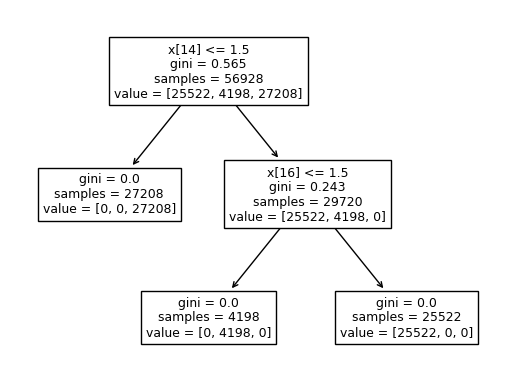

In [17]:
tree.plot_tree(clf)

In [3]:
import pandas as pd
df = pd.read_csv("../../test.csv")

In [8]:
from ml_train_predict import MLPipeline
p = MLPipeline("config.yaml",df)

In [9]:
p.train_test_split()
p.train()
p.predict()
p.classification_report()
p.confusion_matrix()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3403
           1       1.00      1.00      1.00       560
           2       1.00      1.00      1.00      3628

    accuracy                           1.00      7591
   macro avg       1.00      1.00      1.00      7591
weighted avg       1.00      1.00      1.00      7591

[[3403    0    0]
 [   0  560    0]
 [   0    0 3628]]


In [10]:
p.X.columns

Index(['Onboard Wifi Service', 'Onboard Dining Service',
       'Onboard Entertainment', 'Gender', 'Cabin Comfort', 'Cabin service',
       'Baggage handling', 'Port Check-in Service', 'Onboard Service',
       'Cleanliness', 'WiFi', 'Dining', 'Entertainment'],
      dtype='object')

In [11]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Onboard Wifi Service',
       'Onboard Dining Service', 'Online Check-in', 'Cabin Comfort',
       'Onboard Entertainment', 'Cabin service', 'Baggage handling',
       'Port Check-in Service', 'Onboard Service', 'Cleanliness', 'age',
       'Cruise Name', 'Ticket Type', 'Cruise Distance', 'WiFi', 'Dining',
       'Entertainment'],
      dtype='object')